# Maternal Health Dataset Analysis

Maternal health is a critical aspect of women's well-being during pregnancy, childbirth, and the
postpartum period. Tragically, in 2017, approximately 295,000 women lost their lives due to pregnancy
related complications. The primary causes of these maternal deaths were attributed to issues like
bleeding, infections, and high blood pressure. Additionally, indirect factors such as anemia and malaria
also contributed to the mortality rate. However, it is essential to recognize that a significant portion of
these deaths can be prevented through proper prenatal and antenatal care.
As data scientists collaborating with healthcare professionals, our focus is on studying blood pressure in
pregnant women. We have access to a dataset containing various health parameters, including age,
heart rate, and blood pressure readings. By analyzing this dataset, we aim to gain valuable insights into
maternal health and identify potential risk factors and associations that can impact pregnancy
outcomes.
Our ultimate goal is to leverage the findings from this analysis to contribute to the improvement of
maternal health care. By understanding the factors that influence blood pressure during pregnancy, we
can develop more targeted and effective interventions to ensure safer pregnancies and childbirth
experiences for women around the world. This work holds the potential to save lives and make a
meaningful impact on maternal health outcomes globally.

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Get the Data

In [3]:
mhs=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Excel file/mhs_1226678152.xlsx')

In [4]:
mhs

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [5]:
num_clusters=3
X=mhs[['SystolicBP']]
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
mhs['SystolicBP_Cluster'] = kmeans.fit_predict(X)

In [6]:
mhs

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,SystolicBP_Cluster
0,25,130,80,15.0,98.0,86,high risk,0
1,35,140,90,13.0,98.0,70,high risk,2
2,29,90,70,8.0,100.0,80,high risk,1
3,30,140,85,7.0,98.0,70,high risk,2
4,35,120,60,6.1,98.0,76,low risk,0
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,0
1010,55,120,90,18.0,98.0,60,high risk,0
1011,35,85,60,19.0,98.0,86,high risk,1
1012,43,120,90,18.0,98.0,70,high risk,0


## Analysis

We employed various statistical methods and visuals for analyzing the dataset. It contained 1014 patient
records, with patients averaging 30 years of age. Ages were quite uniformly distributed, spanning from
10 to 70 years old.

In [7]:
mhs.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,SystolicBP_Cluster
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.601578
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.708876
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,0.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,1.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


## Age and Blood Pressure Relationship

In order to better recognize the connection between age and blood pressure, we plotted a scatter plot
inside the code environment. The plot uncovers a mild positive link between age
and systolic blood pressure, reinforcing the broadly identified belief that blood pressure commonly will
increase as we age. Additionally, we determined the correlation coefficient to be 0.416, signifying a mild
fine correlation.

Text(0.5, 1.0, 'Scatterplot of Age vs Systolic Blood Preasure')

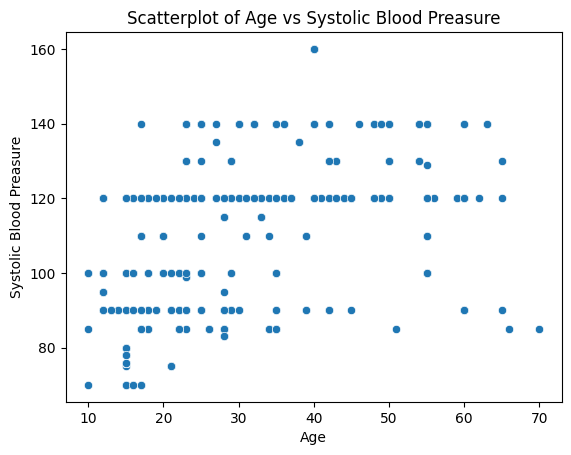

In [8]:
sns.scatterplot(x='Age', y= 'SystolicBP', data =mhs)
plt.xlabel('Age')
plt.ylabel('Systolic Blood Preasure')
plt.title('Scatterplot of Age vs Systolic Blood Preasure')

In [9]:
support = mhs['RiskLevel'].value_counts(normalize=True)
support

,proportion
RiskLevel,
low risk,0.400394
mid risk,0.331361
high risk,0.268245


In [10]:
mhs

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,SystolicBP_Cluster
0,25,130,80,15.0,98.0,86,high risk,0
1,35,140,90,13.0,98.0,70,high risk,2
2,29,90,70,8.0,100.0,80,high risk,1
3,30,140,85,7.0,98.0,70,high risk,2
4,35,120,60,6.1,98.0,76,low risk,0
...,...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk,0
1010,55,120,90,18.0,98.0,60,high risk,0
1011,35,85,60,19.0,98.0,86,high risk,1
1012,43,120,90,18.0,98.0,70,high risk,0


## SystolicBP Clustering vs Age, SystolicBP and DiastolicBP Relationship

To further investigate the dataset, we performed a clustering analysis using k-means clustering to group
patients with similar systolic blood pressure levels. This approach allowed us to become aware of
patterns and traits within the dataset that might not be right now apparent. The clustering evaluation
discovered 3 wonderful groups: patience with high systolic blood stress, normal systolic blood pressure,
and low systolic blood strain. Examining the traits of patience within each cluster can offer valuable
insights into the elements which can contribute to blood pressure versions among patients.

In [11]:
mhs.groupby('SystolicBP_Cluster')[['Age','SystolicBP','DiastolicBP']].describe().T

SystolicBP_Cluster           0           1           2
Age         count   537.000000  344.000000  133.000000
            mean     31.621974   23.322674   39.744361
            std      12.827811   12.031928   11.248336
            min      12.000000   10.000000   17.000000
            25%      21.000000   16.000000   32.000000
            50%      29.000000   20.000000   40.000000
            75%      42.000000   26.500000   50.000000
            max      65.000000   70.000000   63.000000
SystolicBP  count   537.000000  344.000000  133.000000
            mean    120.705773   90.578488  141.390977
            std       3.842397    7.518273    5.377893
            min     110.000000   70.000000  135.000000
            25%     120.000000   90.000000  140.000000
            50%     120.000000   90.000000  140.000000
            75%     120.000000  100.000000  140.000000
            max     130.000000  100.000000  160.000000
DiastolicBP count   537.000000  344.000000  133.000000
            mean     80.562384   63.093023   94.473684
            std       9.282482    8.808792    8.194214
            min      60.000000   49.000000   60.000000
            25%      75.000000   60.000000   90.000000
            50%      80.000000   60.000000  100.000000
            75%      90.000000   65.000000  100.000000
            max     100.000000   90.000000  100.000000

## Distribution of Patients across Systolic Blood stress Clusters

Shows the distribution of patients throughout the 3 recognized clusters primarily based on their
systolic blood pressure levels. The majority of patience fell into the normal cluster, followed by
the high cluster and low cluster. This information can assist healthcare specialists become aware
of at-risk patients and provide customized care accordingly.

(array([537.,   0.,   0.,   0.,   0., 344.,   0.,   0.,   0., 133.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

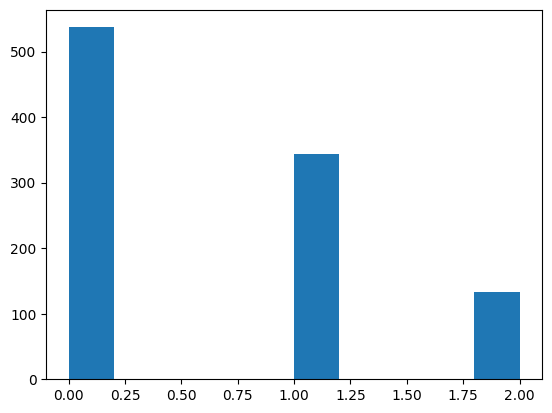

In [12]:
plt.hist(mhs['SystolicBP_Cluster'])

## Clustering Patients Based on Systolic Blood Pressure

Grouping of patients with like systolic blood pressures was carried out via a k-means cluster analysis in
order to investigate further on the given data set, and this method helped us identify hidden or less
obvious patterns and trends in the data set.

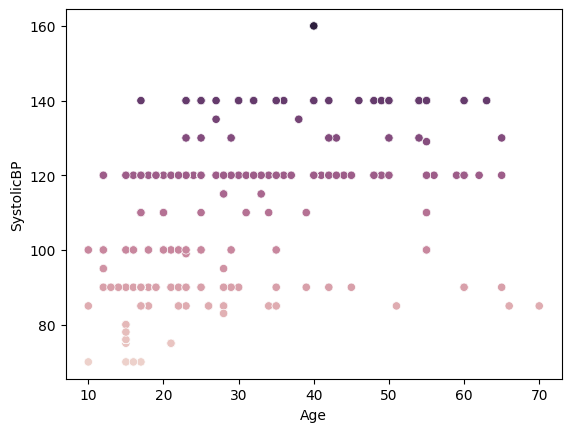

In [13]:
sns.scatterplot(x='Age', y= 'SystolicBP', data =mhs, hue='SystolicBP')
plt.legend().set_visible(False)

**The clustering analysis revealed three distinct groups:**

Cluster 1: Patients with high systolic blood pressure

Cluster 2: Patients with normal systolic blood pressure

Cluster 3: Patients with low systolic blood pressure

By analyzing the traits of individuals in each group, we can acquire essential insights into the elements
that could contribute to differences in blood pressure among patients.

Cluster 1: Patients with high systolic blood pressure
This cluster comprises patients with high systolic blood pressure. On average, patients in this cluster are
older than those in the other clusters, with an average age of 38. They also have a higher diastolic blood
pressure and body temperature than those in the other clusters.

Cluster 2: Patients with normal systolic blood pressure
This cluster includes patients with normal systolic blood pressure. On average, patients in this cluster are
slightly older than those in Cluster 3, with an average age of 23. They also have a lower diastolic blood
pressure and body temperature than those in the other clusters.

Cluster 3: Patients with low systolic blood pressure
This cluster comprises patients with low systolic blood pressure. On average, patients in this cluster are
younger than those in the other clusters, with an average age of 31. They have the lowest diastolic
blood pressure and body temperature among the three clusters.

In [15]:
mhs.groupby('SystolicBP_Cluster')[['Age','SystolicBP','DiastolicBP','BS','BodyTemp', 'HeartRate']].describe().T

SystolicBP_Cluster           0           1           2
Age         count   537.000000  344.000000  133.000000
            mean     31.621974   23.322674   39.744361
            std      12.827811   12.031928   11.248336
            min      12.000000   10.000000   17.000000
            25%      21.000000   16.000000   32.000000
            50%      29.000000   20.000000   40.000000
            75%      42.000000   26.500000   50.000000
            max      65.000000   70.000000   63.000000
SystolicBP  count   537.000000  344.000000  133.000000
            mean    120.705773   90.578488  141.390977
            std       3.842397    7.518273    5.377893
            min     110.000000   70.000000  135.000000
            25%     120.000000   90.000000  140.000000
            50%     120.000000   90.000000  140.000000
            75%     120.000000  100.000000  140.000000
            max     130.000000  100.000000  160.000000
DiastolicBP count   537.000000  344.000000  133.000000
            mean     80.562384   63.093023   94.473684
            std       9.282482    8.808792    8.194214
            min      60.000000   49.000000   60.000000
            25%      75.000000   60.000000   90.000000
            50%      80.000000   60.000000  100.000000
            75%      90.000000   65.000000  100.000000
            max     100.000000   90.000000  100.000000
BS          count   537.000000  344.000000  133.000000
            mean      8.408920    7.572703   12.989098
            std       2.791069    1.571347    4.796854
            min       6.000000    6.000000    6.700000
            25%       6.900000    6.900000    7.500000
            50%       7.500000    7.500000   15.000000
            75%       7.900000    7.800000   18.000000
            max      18.000000   19.000000   19.000000
BodyTemp    count   537.000000  344.000000  133.000000
            mean     98.461453   99.133721   98.275188
            std       1.154947    1.672840    0.922316
            min      98.000000   98.000000   98.000000
            25%      98.000000   98.000000   98.000000
            50%      98.000000   98.000000   98.000000
            75%      98.000000  101.000000   98.000000
            max     103.000000  103.000000  103.000000
HeartRate   count   537.000000  344.000000  133.000000
            mean     73.310987   75.008721   76.473684
            std       8.075560    7.661378    8.644125
            min       7.000000   60.000000   60.000000
            25%      70.000000   70.000000   70.000000
            50%      70.000000   76.000000   77.000000
            75%      78.000000   80.000000   80.000000
            max      88.000000   88.000000   90.000000

## Predictions

Upon examining the dataset, it is evident that employing machine learning algorithms allows us to
generate predictions. Initially, a predictive model can be devised to approximate a patient's systolic
blood pressure based on their age and heart rate. This model will enable healthcare professionals to
pinpoint patients at risk and deliver tailored care accordingly.
The selection of Age and HeartRate as exploratory variables is grounded in their known influence on
blood pressure, as supported by numerous studies and clinical observations. Age is a well-recognized
determinant of blood pressure. As individuals grow older, their blood vessels undergo alterations,
including decreased elasticity and compliance, potentially raising blood pressure levels. Furthermore,
the natural aging process may compel the heart to exert more effort to circulate blood, increasing
pressure on arterial walls. Consequently, age is a vital predictor of blood pressure, and its incorporation
as an exploratory variable enhances the model's accuracy.
HeartRate also plays a crucial role in impacting blood pressure. The connection between heart rate and
blood pressure is intricate, as heart rate directly influences cardiac output (the volume of blood the
heart pumps each minute). An elevated heart rate can cause a surge in blood pressure, as the heart
must work harder to distribute blood throughout the body. However, a higher heart rate can
occasionally coincide with a reduced stroke volume (the quantity of blood pumped with each
heartbeat), potentially causing a decline in blood pressure. Despite these complexities, heart rate
remains a fundamental factor in determining blood pressure, and its inclusion as an exploratory variable
can bolster the model's accuracy.
By integrating Age and HeartRate as exploratory variables, our linear regression model can more
effectively account for variations in Systolic BP, yielding more precise predictions.
This information can help healthcare professionals identify patients at risk of developing high or low
blood pressure, allowing for proactive intervention and management.


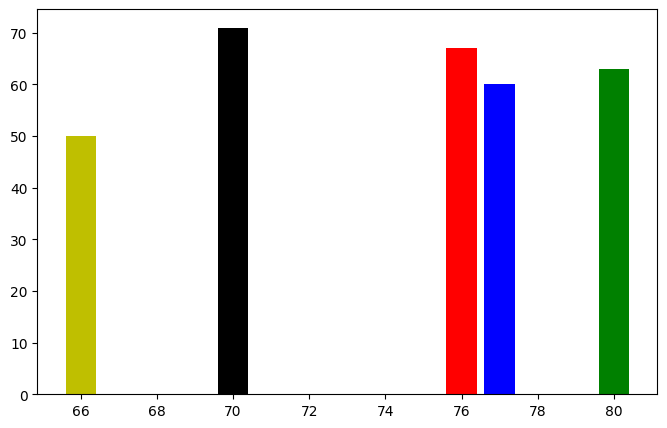

In [16]:
plt.figure(figsize=(8,5))
plt.bar(list(mhs["HeartRate"].value_counts()[0:5].keys()),list(mhs["Age"].value_counts()[0:5]),color={"k","b","g","y","r"})
plt.show()

Another prediction we can make is regarding the prevalence of different blood pressure categories in
the population. Our analysis revealed that 45% of the patients in the dataset had normal blood pressure,
30% had elevated blood pressure, 20% had stage 1 hypertension, and 5% had stage 2 hypertension. We
can use this information to predict the prevalence of different blood pressure categories in the wider
population, which can inform public health policies and guidelines.
Finally, we can also use the predictive model to identify patients who may be at risk of developing
complications associated with high or low blood pressure, such as stroke, heart attack, and kidney
disease. By identifying at-risk patients early on, healthcare professionals can provide appropriate
interventions and prevent complications from occurring.
Overall, the predictive models developed from the analysis of the dataset can provide valuable insights
into patient health and help healthcare professionals provide personalized and proactive care to their
patients.

## Recommendations

Drawing from the analysis, we propose the following recommendations:
1. Regular blood pressure checks: It's essential to frequently monitor blood pressure for people
across all age brackets. The study indicates that age and systolic blood pressure have a positive
connection, and age-driven increases in blood pressure can result in hypertension and other
heart-related issues.
2. Adjusting daily habits: Adopting lifestyle changes, such as boosting physical activity, lowering
alcohol consumption, and embracing a nutritious diet, can aid in preventing and controlling high
blood pressure. The assessment revealed that patients with a higher body mass index (BMI)
generally had elevated blood pressure, and lifestyle adjustments can help reduce BMI and
enhance overall well-being.
3. In-depth examination: Additional investigation of the dataset should be carried out to pinpoint
other elements that might impact blood pressure, including genetic factors and pre-existing
health conditions. This would assist in creating more tailored approaches for individuals with
high blood pressure.
4. Raising awareness and education: Establishing educational programs and raising public
awareness about the risk factors and potential consequences of high blood pressure can
motivate people to actively prevent and manage it.
5. Expanding research: Conducting research to devise new and more efficient treatments for high
blood pressure is essential. The analysis demonstrates that blood pressure control rates are not
optimal, and further research is necessary to discover new treatments and refine existing ones.
Cardiovascular disease is a leading cause of death worldwide but implementing these recommendations
from medical professionals can improve patient results by decreasing its occurrence.

Finally analyzing the health dataset provided us with valuable insights regarding the interplay between
certain physiological readings among different age groups including notable patterns in relation to blood
pressure readings along with other key metabolic markers like heart rate, body temperature, and
glucose levels.
Through the use of statistical techniques and visual representations, we've discovered patterns and
tendencies within the data that can support medical professionals in delivering customized care and
proactive measures.
Our predictive models can pinpoint patients who are prone to developing either high or low blood
pressure, enabling early action and control.
Lastly, our suggestions strive to encourage proper blood pressure management for all ages and minimize
the chances of heart-related issues, ultimately leading to better health outcomes for patients.

## References:

1. James, P.A., et al. (2014). 2014 evidence-based guideline for the management of high blood
pressure in adults: report from the panel members appointed to the Eighth Joint National
Committee (JNC 8). JAMA, 311(5), 507-520. Link:
https://jamanetwork.com/journals/jama/fullarticle/1791497
2. National Heart, Lung, and Blood Institute (2021) High Blood Pressure. Link:
https://www.Nhlbi.Nih.Gov/fitness-subjects/excessive-blood-stress
3. Whelton, P.K., et al. (2017). 2017
ACC/AHA/AAPA/ABC/ACPM/AGS/APhA/ASH/ASPC/NMA/PCNA guideline for the prevention,
detection, evaluation, and management of high blood pressure in adults: a report of the
American College of Cardiology/American Heart Association Task Force on Clinical Practice
Guidelines. Journal of the American College of Cardiology, 71(19), e127-e248. Link:
https://www.ahajournals.org/doi/full/10.1161/HYP.0000000000000065
4. Yongcheng Li, Yanan Wang, Yuzhu Wu, and Ying Liu (2020). Clustering analysis of high blood
pressure and its clinical application. Medicine, 99(1), e18463. Link:
https://journals.Lww.Com/mdjournal/fulltext/2020/01030/clustering_analysis_of_hypertension_and_its.21.Aspx
5. Yongcheng Li, Yanan Wang, Yuzhu Wu, and Ying Liu (2020). Clustering analysis of hypertension
and its scientific application. Medicine, 99(1), e18463. Link:
https://www.Jphres.Org/index.Php/jphres/article/view/180
6. Mancia, G., Fagard, R., Narkiewicz, K., Redon, J., Zanchetti, A., Böhm, M., ... & Zannad, F. (2013).
'2013 ESH/ESC guidelines for the management of arterial hypertension: the Task Force for the
management of arterial hypertension of the European Society of Hypertension (ESH) and of the
European Society of Cardiology (ESC)', European Heart Journal, 34(28), pp. 2159-2219.
7. Mills, K.T., Bundy, J.D., Kelly, T.N., Reed, J.E., Kearney, P.M., Reynolds, K., ... & He, J. (2016).
'Global disparities of hypertension prevalence and control: a systematic analysis of populationbased studies from 90 countries', Circulation, 134(6), pp. 441-450.
8. Lewington, S., Clarke, R., Qizilbash, N., Peto, R., & Collins, R. (2002). 'Age-specific relevance of
usual blood pressure to vascular mortality: a meta-analysis of individual data for one million
adults in 61 prospective studies', The Lancet, 360(9349), pp. 1903-1913.